# Solar Assessment

### Setup

Import required packages for effective operation of notebook.

In [290]:
# Import Pandas for data frames
import pandas as pd

# Import Numpy
import numpy as np

# Import Seaborn for plotting
import seaborn as sns

# Import matplotlib for plot adjustments
import matplotlib as plt


### Assessment Steps

1. Clean and review 'energy_usage' data in preparation for analysis.
2. Determine piek usage periods and general trends
3. Prepare 'solar_generation' data for assessment
4. Compare both files to determine:
    - Estimated annual energy saving
    - Benefit of battery install
    - 

#### _1. Clean & Review Usage Data_

Usage data can be obtained from [ESB Networks](https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters?https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters&gclsrc=aw.ds&gad_source=1&gad_campaignid=13801609571&gbraid=0AAAAADg-OV56fXOruwBwK5fnkCqsCekBB&gclid=EAIaIQobChMI1Pvrq-6KkQMVbZNQBh1BSCRQEAAYASAAEgIBBfD_BwE) using the intended connection MPRN number. Several diferent levels of information can be downloaded, but for the purpose of this review, daily meter readings was downloaded. This data goes back for a period of 2 years. The file is titled 'meter_readings', located in the 'data' folder.

The first step is a quick check to confirm the 'data' directory is there, and has the 'meter_readings.csv' file within it.

In [291]:
# Check the directory and file are there
!dir "./data"

 Volume in drive C is OS
 Volume Serial Number is 74A1-F0F8

 Directory of c:\Users\danie\Course\PFDA\project\data

09/12/2025  19:32    <DIR>          .
24/11/2025  11:46    <DIR>          ..
09/12/2025  19:32            68,078 meter_readings.csv
04/12/2025  15:27         2,089,751 solar_gen.csv
               2 File(s)      2,157,829 bytes
               2 Dir(s)  363,218,751,488 bytes free


Now that the file name and location are confirmed, the CSV file can be pulled in as a data frame.

In [292]:
# Data location
url = "./data/"

# Specify filename
filename="meter_readings.csv"

# Read .cvs into a data frame
df_usage = pd.read_csv(url + filename)

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Read Date and End Time
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),07/12/2025 00:00
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),07/12/2025 00:00
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),06/12/2025 00:00
3,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),06/12/2025 00:00
4,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh),05/12/2025 00:00


For simplicity in coding later on, the 'Read Date and End Time' column will be renamed to just 'Date'.

In [293]:
# Rename column
df_usage = df_usage.rename(columns={'Read Date and End Time':'Date'})

# Show first 5 rows to confirm
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),07/12/2025 00:00
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),07/12/2025 00:00
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),06/12/2025 00:00
3,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),06/12/2025 00:00
4,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh),05/12/2025 00:00


For manipulating and reviewing the data, the date must be converted to a common datetime format.

In [294]:
# Show 'Date' column
df_usage['Date']

0      07/12/2025 00:00
1      07/12/2025 00:00
2      06/12/2025 00:00
3      06/12/2025 00:00
4      05/12/2025 00:00
             ...       
823    05/12/2023 00:00
824    04/12/2023 00:00
825    03/12/2023 00:00
826    02/12/2023 00:00
827    01/12/2023 00:00
Name: Date, Length: 828, dtype: object

It can be seen that the date is currently captured in a DD/MM/YY HH:MM format. This must be specified in the code, so that datetime format can be applied.

In [295]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df_usage['Date'], format='%d/%m/%Y %H:%M')

0     2025-12-07
1     2025-12-07
2     2025-12-06
3     2025-12-06
4     2025-12-05
         ...    
823   2023-12-05
824   2023-12-04
825   2023-12-03
826   2023-12-02
827   2023-12-01
Name: Date, Length: 828, dtype: datetime64[ns]

This is now in datetime format however, it can be seen that the hours and minutes have been dropped. Datetime does this when the hours and minutes are 00:00. This is acceptable, as it will not impact any later coding.

the next step is to apply the new datetime format to the data frame.

In [296]:
# Apply datetime format to 'Date' column
df_usage["Date"]= pd.to_datetime(df_usage['Date'], format='%d/%m/%Y %H:%M')

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh),2025-12-07
1,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),2025-12-07
2,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh),2025-12-06
3,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh),2025-12-06
4,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh),2025-12-05


The Date column can now be set as the index.

In [297]:
# Set 'Date' column as index of dataframe
df_usage.set_index('Date', inplace=True)

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-12-07,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh)
2025-12-07,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh)
2025-12-06,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh)
2025-12-06,100109xxxxx,223xxxxx,0.000,24 Hr Active Export Register (kWh)
2025-12-05,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh)


In [298]:
# Show last 5 rows
df_usage.tail()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2023-12-05,100109xxxxx,223xxxxx,1583.060,24 Hr Active Import Register (kWh)
2023-12-04,100109xxxxx,223xxxxx,1572.594,24 Hr Active Import Register (kWh)
2023-12-03,100109xxxxx,223xxxxx,1563.174,24 Hr Active Import Register (kWh)
2023-12-02,100109xxxxx,223xxxxx,1547.617,24 Hr Active Import Register (kWh)
2023-12-01,100109xxxxx,223xxxxx,1534.685,24 Hr Active Import Register (kWh)


It can be seen in the 'Read Type' column that there are 2 different rows; Import and Export. For the purpose of this, we only need to conside Import ie. power consumed by the household.

In [299]:
# Remove export rows, and focus solely on import
df_import = df_usage[df_usage["Read Type"] == "24 Hr Active Import Register (kWh)"]

# Show firts 5 rows
df_import.head()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-12-07,100109xxxxx,223xxxxx,10264.209,24 Hr Active Import Register (kWh)
2025-12-06,100109xxxxx,223xxxxx,10256.147,24 Hr Active Import Register (kWh)
2025-12-05,100109xxxxx,223xxxxx,10248.484,24 Hr Active Import Register (kWh)
2025-12-04,100109xxxxx,223xxxxx,10239.189,24 Hr Active Import Register (kWh)
2025-12-03,100109xxxxx,223xxxxx,10231.011,24 Hr Active Import Register (kWh)


Now the unrequired columns can be removed.

In [300]:
# Comfirm all column names
headers = df_import.columns.tolist()

# Show list
headers

['MPRN', 'Meter Serial Number', 'Read Value', 'Read Type']

In [301]:
# Create list of columns to remove
drop_col_list = ['MPRN','Meter Serial Number','Read Type']

# Remove columns list
df_import.drop(columns=drop_col_list, inplace=True)

# Show first 5 rows.
df_import.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_18464\1613923774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import.drop(columns=drop_col_list, inplace=True)


,Read Value
Date,
2025-12-07,10264.209
2025-12-06,10256.147
2025-12-05,10248.484
2025-12-04,10239.189
2025-12-03,10231.011


This now leaves a simple data frame, with 2 columns, the index (Date) and 'Read Value'. The index can now be reset.

In [302]:
#daily_con = daily_con.reset_index()
df_import = df_import.reset_index()
#daily_con.head()

df_import.head()

,Date,Read Value
0,2025-12-07,10264.209
1,2025-12-06,10256.147
2,2025-12-05,10248.484
3,2025-12-04,10239.189
4,2025-12-03,10231.011


A line plot can now be created to confirm there are now data anomilies. Show have a realively smooth line, continually increasing.

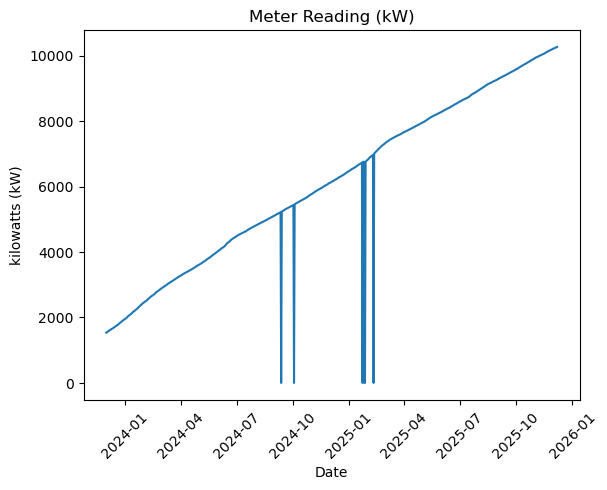

In [303]:
# Use seaborn to create lineplot, specifying Date on x-axis, and Read Value on y-axis
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Specify plot title
ax.set_title('Meter Reading (kW)')

# Rotate axis text
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45)

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that on some dates, the meter reading was 0.0. This could be due to an error on the ESB Networks system, or a power outage at the time the reading was due to be submitted. To rectify, the back fill function will be used, applying the meter reading number from the day prior. This will show a usage of 0.0 kW for the given days, but given the small amount of them, it won't impact the overall results.

In [304]:
# Replace all 0.0 with prior date details.
df_import = df_import.replace(0.0, method='bfill')

C:\Users\danie\AppData\Local\Temp\ipykernel_18464\3178421780.py:2: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df_import = df_import.replace(0.0, method='bfill')


A repeat linepolt can now be created to confirm a smooth line.

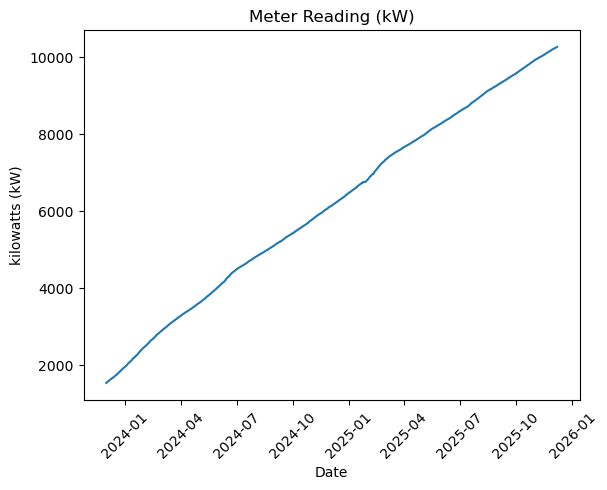

In [305]:
# Create lineplot
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Plot title
ax.set_title('Meter Reading (kW)')

# Rotate axis text
ax.tick_params(axis='x', labelrotation=45)

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that there are no dips in the line, therefore the data can be considered clean, allowing it to be analysed.

To do this, the meter readings need to be converted to daily consumption. This is determined in the difference of the current and previous days reading. The results are applied to a new column (Usage)

In [306]:
# Calculate difference with previous row
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
df_import["Usage"] = df_import["Read Value"].diff()

# Show first 5 rows
df_import.head()


,Date,Read Value,Usage
0,2025-12-07,10264.209,NaN
1,2025-12-06,10256.147,-8.062
2,2025-12-05,10248.484,-7.663
3,2025-12-04,10239.189,-9.295
4,2025-12-03,10231.011,-8.178


Given the results are negative, the ``.diff()`` command needs to be changed to calculate against the following row. This is done by applying ``-1`` within the brackets.

In [307]:
# Calculate difference with following row
df_import["Usage"] = df_import["Read Value"].diff(-1)

# Show first 5 rows
df_import.head()

,Date,Read Value,Usage
0,2025-12-07,10264.209,8.062
1,2025-12-06,10256.147,7.663
2,2025-12-05,10248.484,9.295
3,2025-12-04,10239.189,8.178
4,2025-12-03,10231.011,10.061


In [308]:
# Show last 5 rows
df_import.tail()

,Date,Read Value,Usage
733,2023-12-05,1583.060,10.466
734,2023-12-04,1572.594,9.420
735,2023-12-03,1563.174,15.557
736,2023-12-02,1547.617,12.932
737,2023-12-01,1534.685,NaN


It can be seen that the earliest date (Dec 1st 20223) returns a NaN, as it has no previous number to reference off.

Plots can now be created of the usage, to get a visual understanding.

#### _2. Usage & Trends_

With the ``df_import`` dataframe, a lineplot can be generated, to show the trend of daily usage.

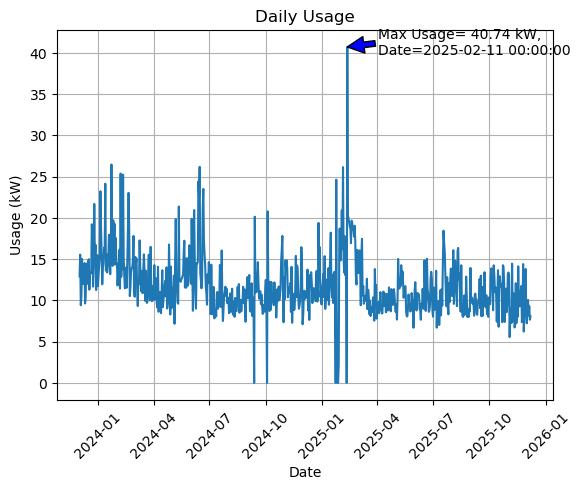

In [309]:
# Create lineplot
ax = sns.lineplot(data=df_import, x="Date", y="Usage")

# Specify plot title
ax.set_title('Daily Usage')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Usage (kW)')

# Rotate axis text
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45)

# Add grid lines
ax.grid()

# Determine max amount using '.max()'
# Source: https://www.geeksforgeeks.org/python/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/
max_dly_usage = df_import['Usage'].max()

# Confirm index position of max usage
max_dly_index_pos = df_import['Usage'].idxmax()

# Confirm date of indicated index position
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
max_dly_date = df_import.loc[max_dly_index_pos, 'Date']

# Specify text layout
max_dly_text = f"Max Usage={max_dly_usage: .2f} kW,\nDate={max_dly_date}"

# Add maximum details to plot
# Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html
ax.annotate(max_dly_text, xy=(max_dly_date, max_dly_usage), xytext=(max_dly_date+pd.Timedelta(days=+50),
            max_dly_usage-1), arrowprops=dict(facecolor='blue'));

Understandably this does show a slight trend of higher consumption in the colder and darker winter days, compared to that of the brighter and warmer summer period. It can alse be seen that the maximum daily usage occured on February 11th 2025, 40.74 kW however, checking the data, and this is the day after a zero meter reading, so is accounting for 2 days and therefore an outlier.

To give a slightly clearer view, additional graphs can be plotted, capturing the weekly and monthly usage trends however, given the data frame starts on December 1st 2023, a Thursday, it will generate incomplete data for the week ending December 3rd. Due to this, the dates from the 1st to 3rd of December 2023 will have to be removed.

In [310]:
# Create weekly data frame.
df_import_wkly = df_import.set_index('Date')

# Show last 5 rows
df_import_wkly.tail()

,Read Value,Usage
Date,,
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420
2023-12-03,1563.174,15.557
2023-12-02,1547.617,12.932
2023-12-01,1534.685,NaN


In [311]:
# Remove the specified dates earlier than December 4th 2023
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_import_wkly = df_import_wkly.drop(['2023-12-03', '2023-12-02', '2023-12-01'], errors='ignore')

# Show last 5 rows
df_import_wkly.tail()

,Read Value,Usage
Date,,
2023-12-08,1622.088,11.987
2023-12-07,1610.101,12.013
2023-12-06,1598.088,15.028
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420


It can now be seen that the data starts on December 4th 2023, which is a Monday (start of the week). A similar process needs to be completed for the end of the data also.

In [312]:
# Show first 7 rows
df_import_wkly.head(7)

,Read Value,Usage
Date,,
2025-12-07,10264.209,8.062
2025-12-06,10256.147,7.663
2025-12-05,10248.484,9.295
2025-12-04,10239.189,8.178
2025-12-03,10231.011,10.061
2025-12-02,10220.950,9.311
2025-12-01,10211.639,7.225


The 7th of December 2025 is a Sunday, so the data does not need to be tidied. The weekly usage can therefore be determined. 

In [313]:
# Determing the weekly ('W') usage 
df_import_wkly = df_import_wkly["Usage"].resample('W').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_wkly.head()

,Date,Usage
0,2023-12-10,86.926
1,2023-12-17,88.930
2,2023-12-24,99.863
3,2023-12-31,106.545
4,2024-01-07,112.157


With the dataframe now showing the sum value usage for each week, a lineplot can be generated.

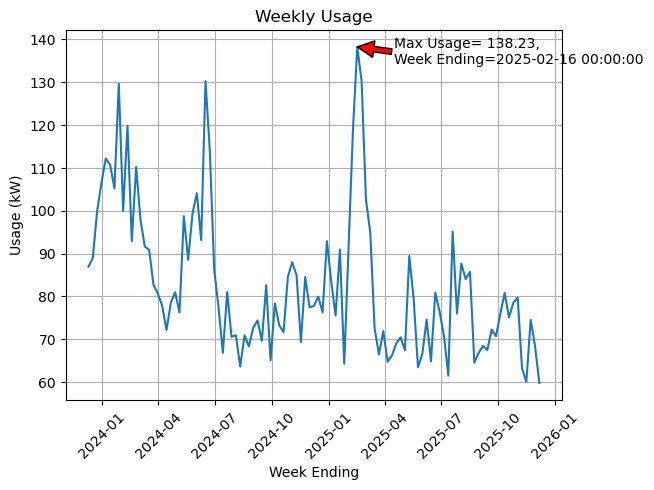

In [314]:
# Create lineplot
ax = sns.lineplot(data=df_import_wkly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Weekly Usage')

# Adjust names of axes.
ax.set_xlabel('Week Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add grid lines
ax.grid()

# Determine max amount
max_usage = df_import_wkly['Usage'].max()

# Confirm index position of max usage
max_index_pos = df_import_wkly['Usage'].idxmax()

# Confirm date of indicated index position
max_date = df_import_wkly.loc[max_index_pos, 'Date']

# Specify text layout
max_text = f"Max Usage={max_usage: .2f},\nWeek Ending={max_date}"

# Add maximum details to plot
ax.annotate(max_text, xy=(max_date, max_usage), xytext=(max_date+pd.Timedelta(days=60),
            max_usage-4), arrowprops=dict(facecolor='red'));

Interestingly, this doesn't shows a similar trend as the daily linelplot. Increased demand can be seen in the winter months when compared with the summer of the same year however, February and June in 2024 appear to be very high.

A similar plot for monthly demand can be done to see if there are any trends.

In [315]:
df_import.head()

,Date,Read Value,Usage
0,2025-12-07,10264.209,8.062
1,2025-12-06,10256.147,7.663
2,2025-12-05,10248.484,9.295
3,2025-12-04,10239.189,8.178
4,2025-12-03,10231.011,10.061


In [316]:
# Create 'mtly' data frame.
df_import_mtly = df_import.set_index('Date')

# Show first 5 rows
df_import_mtly.head()

,Read Value,Usage
Date,,
2025-12-07,10264.209,8.062
2025-12-06,10256.147,7.663
2025-12-05,10248.484,9.295
2025-12-04,10239.189,8.178
2025-12-03,10231.011,10.061


In [317]:
df_import_mtly = df_import_mtly.drop(['2025-12-07', '2025-12-06', '2025-12-05', '2025-12-04', '2025-12-03', '2025-12-02', '2025-12-01'], errors='ignore')

# Show first 5 rows
df_import_mtly.head()

,Read Value,Usage
Date,,
2025-11-30,10204.414,8.758
2025-11-29,10195.656,13.815
2025-11-28,10181.841,8.098
2025-11-27,10173.743,8.122
2025-11-26,10165.621,6.235


In [318]:
df_import_mtly.tail()

,Read Value,Usage
Date,,
2023-12-05,1583.060,10.466
2023-12-04,1572.594,9.420
2023-12-03,1563.174,15.557
2023-12-02,1547.617,12.932
2023-12-01,1534.685,NaN


In [319]:
# Determing the monthly ('ME') usage
df_import_mtly = df_import_mtly["Usage"].resample('ME').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_mtly.head()

,Date,Usage
0,2023-12-31,410.753
1,2024-01-31,504.379
2,2024-02-29,433.831
3,2024-03-31,386.015
4,2024-04-30,332.569


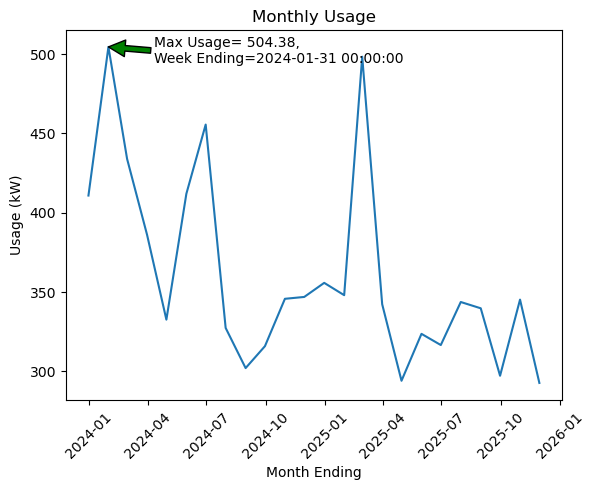

In [320]:
# Create lineplot
ax = sns.lineplot(data=df_import_mtly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Monthly Usage')

# Adjust names of axes.
ax.set_xlabel('Month Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Determine max amount
max_mtly_usage = df_import_mtly['Usage'].max()

# Confirm index position of max usage
max_mtly_index_pos = df_import_mtly['Usage'].idxmax()

# Confirm date of indicated index position
max_mtly_date = df_import_mtly.loc[max_mtly_index_pos, 'Date']

# Specify text layout
max_mtly_text = f"Max Usage={max_mtly_usage: .2f},\nWeek Ending={max_mtly_date}"

# Add maximum details to plot
ax.annotate(max_mtly_text, xy=(max_mtly_date, max_mtly_usage), xytext=(max_mtly_date+pd.Timedelta(days=70),
            max_mtly_usage-10), arrowprops=dict(facecolor='green'));

##### _Results overview_

**Add details**

#### _3. Solar Generation Potential_

To determine the estimated solar generation potential, data can be found [HERE](https://re.jrc.ec.europa.eu/pvg_tools/en/#PVP). This is a European Commission site that provides a .csv file for potential solar generation based of certain criteria:
- Location
- Peak solar install generation potential
- Mounting orientation (azimuth)
- Install slope

This file can be found in the [DATA](https://github.com/danielfinnerty/PFDA/tree/main/project/data) direectory, title 'solar_gen.csv'.

In [321]:
# Data location
url = "./data/"

filename="solar_gen.csv"
# Read CVS into a data frame, skipping first 23 rows as these are just acronym definitions
df_gen = pd.read_csv(url + filename, skiprows=10)

# Show first 5 rows
df_gen.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20200101:0011,0,0.0,0.0,6.22,2.14,0.0
1,20200101:0111,0,0.0,0.0,6.20,2.21,0.0
2,20200101:0211,0,0.0,0.0,5.87,2.34,0.0
3,20200101:0311,0,0.0,0.0,5.62,2.48,0.0
4,20200101:0411,0,0.0,0.0,5.43,2.55,0.0


It can be seen that this file has several columns of data; 'P', 'G(i)', 'H_sun', etc. however, to determine the column of interest, we need to review the legend, which is at the end of the data.

In [322]:
# Show last 10 rows.
df_gen.tail(14)

,time,P,G(i),H_sun,T2m,WS10m,Int
52605,20251231:2111,0,0.0,0.0,6.46,6.14,0.0
52606,20251231:2211,0,0.0,0.0,6.47,5.86,0.0
52607,20251231:2311,0,0.0,0.0,6.51,5.66,0.0
52608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52609,P: PV system power (W),NaN,NaN,NaN,NaN,NaN,NaN
52610,G(i): Global irradiance on the inclined plane ...,NaN,NaN,NaN,NaN,NaN,NaN
52611,H_sun: Sun height (degree),NaN,NaN,NaN,NaN,NaN,NaN
52612,T2m: 2-m air temperature (degree Celsius),NaN,NaN,NaN,NaN,NaN,NaN
52613,WS10m: 10-m total wind speed (m/s),NaN,NaN,NaN,NaN,NaN,NaN
52614,Int: 1 means solar radiation values are recons...,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen above the 'P' refers to teh solar generation, and is therefore the column to be used.

Now that this detail is know, these latter rows can me dropped; row 52608 to (and including) 52618.

In [323]:
# Drop rows 52584 to 52590
# Source: https://stackoverflow.com/questions/61673097/dropping-multiple-ranges-of-rows-in-a-pandas-dataframe
df_gen.drop(df_gen.iloc[52608:52619].index, inplace=True)

# Show last 5 rows
df_gen.tail()

,time,P,G(i),H_sun,T2m,WS10m,Int
52603,20251231:1911,0,0.0,0.0,6.72,6.07,0.0
52604,20251231:2011,0,0.0,0.0,6.60,6.21,0.0
52605,20251231:2111,0,0.0,0.0,6.46,6.14,0.0
52606,20251231:2211,0,0.0,0.0,6.47,5.86,0.0
52607,20251231:2311,0,0.0,0.0,6.51,5.66,0.0


With that done, the time must be converted to datetime format, to allow later analysis.

In [324]:
# Show 'time' column
df_gen["time"]

0        20200101:0011
1        20200101:0111
2        20200101:0211
3        20200101:0311
4        20200101:0411
             ...      
52603    20251231:1911
52604    20251231:2011
52605    20251231:2111
52606    20251231:2211
52607    20251231:2311
Name: time, Length: 52608, dtype: object

In [325]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df_gen['time'], format="%Y%m%d:%H%M")

0       2020-01-01 00:11:00
1       2020-01-01 01:11:00
2       2020-01-01 02:11:00
3       2020-01-01 03:11:00
4       2020-01-01 04:11:00
                ...        
52603   2025-12-31 19:11:00
52604   2025-12-31 20:11:00
52605   2025-12-31 21:11:00
52606   2025-12-31 22:11:00
52607   2025-12-31 23:11:00
Name: time, Length: 52608, dtype: datetime64[ns]

In [326]:
# Apply the new datetime format to the data frame in the 'time' column
df_gen["time"]= pd.to_datetime(df_gen['time'], format='%Y%m%d:%H%M')

# show first 5 rows
df_gen.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,2020-01-01 00:11:00,0,0.0,0.0,6.22,2.14,0.0
1,2020-01-01 01:11:00,0,0.0,0.0,6.20,2.21,0.0
2,2020-01-01 02:11:00,0,0.0,0.0,5.87,2.34,0.0
3,2020-01-01 03:11:00,0,0.0,0.0,5.62,2.48,0.0
4,2020-01-01 04:11:00,0,0.0,0.0,5.43,2.55,0.0


This now allows the time column to be applied as the data frame index.

In [327]:
# Apply time column as index
df_gen.set_index('time', inplace=True)

# Show first 5 rows
df_gen.head()

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2020-01-01 00:11:00,0,0.0,0.0,6.22,2.14,0.0
2020-01-01 01:11:00,0,0.0,0.0,6.20,2.21,0.0
2020-01-01 02:11:00,0,0.0,0.0,5.87,2.34,0.0
2020-01-01 03:11:00,0,0.0,0.0,5.62,2.48,0.0
2020-01-01 04:11:00,0,0.0,0.0,5.43,2.55,0.0


With this done, the data frame can be easily reviewed, picking specific dates for review, once entered in the same format as the datetime; YYYY-MM-DD.

In [328]:
df_gen.loc["2023-12-25"]


,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2023-12-25 00:11:00,0,0.00,0.00,7.48,4.14,0.0
2023-12-25 01:11:00,0,0.00,0.00,7.52,4.28,0.0
2023-12-25 02:11:00,0,0.00,0.00,7.58,4.69,0.0
2023-12-25 03:11:00,0,0.00,0.00,7.73,5.10,0.0
2023-12-25 04:11:00,0,0.00,0.00,8.00,5.31,0.0
2023-12-25 05:11:00,0,0.00,0.00,8.30,5.38,0.0
2023-12-25 06:11:00,0,0.00,0.00,8.49,5.31,0.0
2023-12-25 07:11:00,0,0.00,0.00,8.41,4.83,0.0
2023-12-25 08:11:00,0,0.00,0.00,8.45,4.76,0.0


From above, it can be seen that the data is provided over 1 hour increments. To determine daily generation, teh hourly data from each day needs to be added using the ``.reasmple('D').sum()`` command.

In [329]:
# Determing the daily ('D') sum value. 
daily_gen = df_gen["P"].resample('D').sum().reset_index(name='P')

# Show first 5 rows
daily_gen.head()

,time,P
0,2020-01-01,000000000043.24236.57779.722082.411042.27694.2...
1,2020-01-02,0000000000354.022984.18678.35569.29399.72376.2...
2,2020-01-03,00000000001812.332931.272368.791175.012640.053...
3,2020-01-04,0000000000588.46601.291465.44577.76318.391.790...
4,2020-01-05,000000000042.1370.88357.59156.58112.38112.3800...


Given the above output, it can be seen that pandas sees the 'P' column as a string. This needs to be converted to integers so that the ``resample('D').sum()`` command works.

In [330]:
# Confirm 'P' column type
daily_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2192 non-null   datetime64[ns]
 1   P       2192 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 34.4+ KB


In [331]:
# Convert 'P' column to integers
df_gen['P'] = pd.to_numeric(df_gen['P'], errors='coerce')

# Determing the daily ('D') sum
# Divide by 1000 to convert from watts to kilowatts (kW)
daily_gen = df_gen["P"].resample('D').sum().div(1000).reset_index(name='P')

# Show first 5 rows
daily_gen.head()

,time,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103
3,2020-01-04,3.64304
4,2020-01-05,0.85194


This is much better, and now captures the sum generation value for each calendar day.

The daily_gen data frame is now ready for analysis. Firstly a plot can be generated to give an indication of the generation opportunity trend.

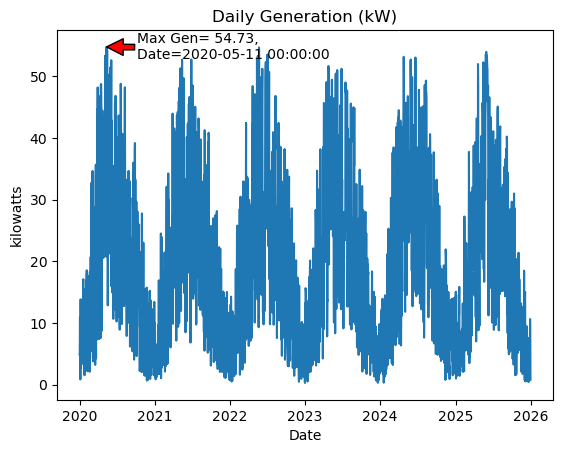

In [332]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=daily_gen, x="time", y="P")

# Specify plot title
ax.set_title('Daily Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Determine max amount
max_dly_gen = daily_gen['P'].max()

# Confirm index position of max usage
max_gen_index_pos = daily_gen['P'].idxmax()

# Confirm date of indicated index position
max_gen_date = daily_gen.loc[max_gen_index_pos, 'time']

# Specify text layout
max_dly_gen_text = f"Max Gen={max_dly_gen: .2f},\nDate={max_gen_date}"

# Add maximum details to plot
ax.annotate(max_dly_gen_text, xy=(max_gen_date, max_dly_gen), xytext=(max_gen_date+pd.Timedelta(days=150),
            max_dly_gen-2), arrowprops=dict(facecolor='red'));

As would be expected, the most generation can be found in the summer months, with brighter and longer daylight periods, in addition to a higher sun giving a better angle on the panels. Peak generation occurring on May 11th.

Similar can be done by month.

In [333]:
# Determing the monthly ('ME') sum
# Divide by 1000 to convert to kilowatts (kW)
mtly_gen = df_gen["P"].resample('ME').sum().div(1000).reset_index(name='P')

# Show first 5 rows
mtly_gen.head()

,time,P
0,2020-01-31,222.58023
1,2020-02-29,371.80750
2,2020-03-31,622.63772
3,2020-04-30,930.99062
4,2020-05-31,1127.46040


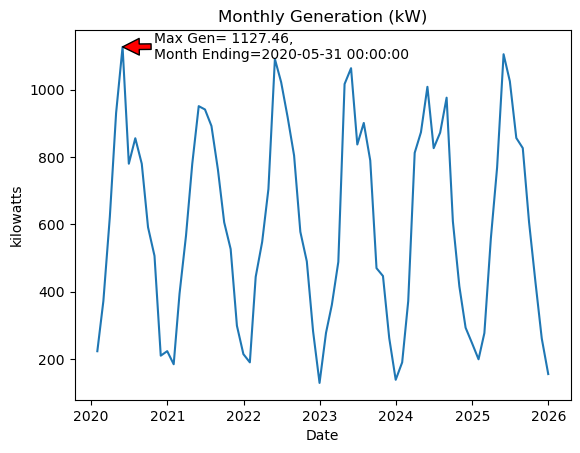

In [334]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=mtly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Monthly Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Determine max amount
max_mtly_gen = mtly_gen['P'].max()

# Confirm index position of max usage
max_mtly_index_pos = mtly_gen['P'].idxmax()

# Confirm date of indicated index position
max_mtly_date = mtly_gen.loc[max_mtly_index_pos, 'time']

# Specify text layout
max_mtly_gen_text = f"Max Gen={max_mtly_gen: .2f},\nMonth Ending={max_mtly_date}"

# Add maximum details to plot
ax.annotate(max_mtly_gen_text, xy=(max_mtly_date, max_mtly_gen), xytext=(max_mtly_date+pd.Timedelta(days=150),
            max_mtly_gen-35), arrowprops=dict(facecolor='red'));

Interestingly, the month with the highest generation, May 2020, is also the same month that had the highest daily figure.

The above can again be repeated, but for the yearly generation.

In [335]:
# Determing the yearly ('YE') mean
# Divide by 1000 to convert to kilowatts (kW)
yrly_gen = df_gen["P"].resample('YE').sum().div(1000).reset_index(name='P')

# Show all rows
yrly_gen

,time,P
0,2020-12-31,7221.27180
1,2021-12-31,7115.84844
2,2022-12-31,7201.07337
3,2023-12-31,7050.73423
4,2024-12-31,7495.04400
5,2025-12-31,7065.46954


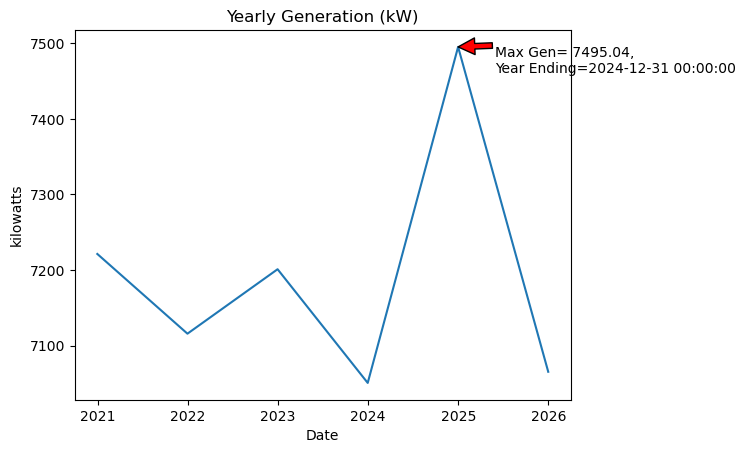

In [336]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=yrly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Yearly Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts')

# Determine max amount
max_yrly_gen = yrly_gen['P'].max()

# Confirm index position of max usage
max_yrly_index_pos = yrly_gen['P'].idxmax()

# Confirm date of indicated index position
max_yrly_date = yrly_gen.loc[max_yrly_index_pos, 'time']

# Specify text layout
max_yrly_gen_text = f"Max Gen={max_yrly_gen: .2f},\nYear Ending={max_yrly_date}"

# Add maximum details to plot
ax.annotate(max_yrly_gen_text, xy=(max_yrly_date, max_yrly_gen), xytext=(max_yrly_date+pd.Timedelta(days=150),
            max_yrly_gen-34), arrowprops=dict(facecolor='red'));

While the above Yearly Generation table appears to show 2022 as having a significantly higher solar generation opportunity than all other years, it is important to recognise that the difference between the best year (2022), and the worst (2021) is only 438 kilowatts, or a little under 6% of 2022's total figure.

#### _4. Data Compare_

In [337]:
daily_gen.head()

,time,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103
3,2020-01-04,3.64304
4,2020-01-05,0.85194


In [338]:
# Rename column
daily_gen_renamed = daily_gen.rename(columns={'time':'Date'})

daily_gen_renamed.head()


,Date,P
0,2020-01-01,4.87848
1,2020-01-02,5.36184
2,2020-01-03,10.96103
3,2020-01-04,3.64304
4,2020-01-05,0.85194


In [339]:
daily_gen_renamed.tail()

,Date,P
2187,2025-12-27,3.64470
2188,2025-12-28,6.34979
2189,2025-12-29,10.62579
2190,2025-12-30,9.12867
2191,2025-12-31,0.77846


In [340]:
# Merge both sets of data, using 'Date' column as reference
# Source: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee
merged_df = pd.merge(df_import, daily_gen_renamed, on='Date')

merged_df.head()

,Date,Read Value,Usage,P
0,2025-12-07,10264.209,8.062,6.57446
1,2025-12-06,10256.147,7.663,0.52336
2,2025-12-05,10248.484,9.295,15.02020
3,2025-12-04,10239.189,8.178,14.47768
4,2025-12-03,10231.011,10.061,0.70282


In [341]:
merged_df.tail()

,Date,Read Value,Usage,P
733,2023-12-05,1583.060,10.466,14.25900
734,2023-12-04,1572.594,9.420,10.59878
735,2023-12-03,1563.174,15.557,1.31354
736,2023-12-02,1547.617,12.932,3.37614
737,2023-12-01,1534.685,NaN,15.03572


Given the Date column was used as reference for aligning the data, only criteria where there is values in both data frames would be captured. From the above 2 cells, this can be seen to be from the 23rd of November 2023 up to the 22nd of November 2025.

These 2 columns of data can now be plotted together.

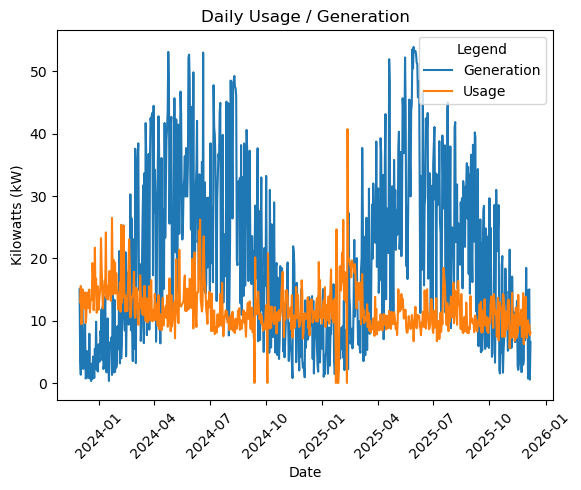

In [342]:
# Use seaborn to create lineplot, specifying date on x-axis, and the generation 'P' on y-axis
ax = sns.lineplot(data=merged_df, x="Date", y="P", label='Generation')

# On the same plot, add 'Usage' data.
sns.lineplot(data=merged_df, x="Date", y="Usage", label='Usage')

# Specify plot title
ax.set_title('Daily Usage / Generation')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Kilowatts (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add legend
ax.legend(loc='upper right', title="Legend");

The above shows that the level of generation by far exceeds usage for significant periods of the year however, to get a better understanding of this, an additional column can be added to the data frame. This new column 'Net Result' will subtract the usage from the generation for each day. A positive result indicates generation exceeds consumption, whereas a negative figure means the opposite.

In [343]:
# Create new column with result from subtracting 'Usage' from 'P'
# Source: https://stackoverflow.com/questions/74054888/subtracting-two-columns-to-form-a-new-column-pandas
merged_df['Result'] = merged_df['P'] - merged_df['Usage']

# Show first 5 rows
merged_df.head()

,Date,Read Value,Usage,P,Result
0,2025-12-07,10264.209,8.062,6.57446,-1.48754
1,2025-12-06,10256.147,7.663,0.52336,-7.13964
2,2025-12-05,10248.484,9.295,15.02020,5.72520
3,2025-12-04,10239.189,8.178,14.47768,6.29968
4,2025-12-03,10231.011,10.061,0.70282,-9.35818


This new result column can now be plotted.

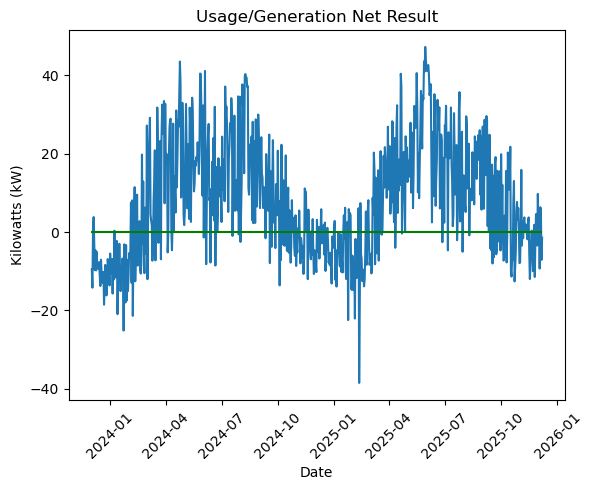

In [344]:
# Create lineplot of 'Result' column
ax = sns.lineplot(data=merged_df, x="Date", y="Result")

# Specify plot title
ax.set_title('Usage/Generation Net Result')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Kilowatts (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)

# Add horizontal line along x-axis using max and min dates for 'xmax' and 'xmin'
# Source: https://www.geeksforgeeks.org/python/matplotlib-axes-axes-hlines-in-python/
ax.hlines(y=[0], colors=['g'], linestyles=['-'], xmin=merged_df['Date'].min(), xmax=merged_df['Date'].max(),);

This clearly shows the excess amount of electricity generated or required over the 2 year period. The amount of excess generation significantly outweighs that of higher demand. The exact figures for each can be calculated.

In [345]:
# Sum all positive values to determine excess generation
excess_gen = merged_df['Result'][merged_df['Result'] > 0].sum()

# Sum all negative values to determine volume of demand outweighing generation
addit_demand = merged_df['Result'][merged_df['Result'] < 0].sum()

# Print results
print(f"Excess power generated={excess_gen: .2f} kW,\nDemnd exceed generation={-addit_demand: .2f} kW")

Excess power generated= 7772.55 kW,
Demnd exceed generation= 1912.60 kW


This shows that over a 2 year period, given the size of the solar install in excess of 10,000 kilowatts of electricity would be returned to the grid. This is a significant factor when considering that the return for feed-in is €0.185, thus equating to approx €1,850 over 2 years.

While this is positive, a further review can be done to see what the impact of including a battery in the system would be.

In [346]:
# Source: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
merged_df['test'] = np.where(merged_df['Result']< 0, 10, 10 - merged_df['Result'])
merged_df.head()

,Date,Read Value,Usage,P,Result,test
0,2025-12-07,10264.209,8.062,6.57446,-1.48754,10.00000
1,2025-12-06,10256.147,7.663,0.52336,-7.13964,10.00000
2,2025-12-05,10248.484,9.295,15.02020,5.72520,4.27480
3,2025-12-04,10239.189,8.178,14.47768,6.29968,3.70032
4,2025-12-03,10231.011,10.061,0.70282,-9.35818,10.00000


## End